<a href="https://colab.research.google.com/github/nxxk23/kidney/blob/main/outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/kidney/stagefold.csv')
df = df.iloc[:, 1:]
df.head()

,PatientUID,PatientVisitUID,CWhen,eGFR,datetime,PreviousDateTime,Sex,Age,ENTY,NATNL,...,G4M2_Febuxostat,G3M2_Ezetimibe,G1M4_Non-dihydropyridine_CCB,G5M1_Ketoanalog_amino_acid,G2M7_GLP1_RA,G4M3_Uricosuric_agent,LabLocation,stage,stage_latest,Fold
0,2299,3386255,2559-08-15 09:51:54.913,71.7,2016-08-15 09:51:54.913,NaN,หญิง,73.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2,2,0
1,2299,3640924,2559-11-11 09:40:06.053,66.8,2016-11-11 09:40:06.053,2016-08-15 09:51:54.913,หญิง,73.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2,2,0
2,2299,4020970,2560-03-31 10:18:54.363,67.2,2017-03-31 10:18:54.363,2016-11-11 09:40:06.053,หญิง,74.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2,2,0
3,2299,4286612,2560-07-05 10:40:40.763,69.2,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363,หญิง,74.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2,2,0
4,2299,4546471,2560-10-03 09:19:54.710,63.6,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763,หญิง,74.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2,2,0


##**check outlier**

In [19]:
numeric = df.select_dtypes(include=['int64', 'float64'])
min_values = numeric.min()
max_values = numeric.max()
mean_values = numeric.mean()
sd_values = numeric.std()
null_count = df.isnull().sum()  # Count null values for each column

result_df = pd.DataFrame({
    'Min': min_values,
    'Max': max_values,
    'Mean': mean_values,
    'SD': sd_values,
    'Null Count': null_count  # Add a new column for null count
})
result_df

,Min,Max,Mean,SD,Null Count
Age,18.00,104.00,66.972452,12.128898,0
BMI,0.00,inf,inf,NaN,90961
BSA,0.00,1701.95,1.689894,6.696492,91001
CWhen,NaN,NaN,NaN,NaN,0
D10_Ischemic_heart_disease,0.00,8.00,0.013591,0.121910,0
...,...,...,...,...,...
VisitLocation,NaN,NaN,NaN,NaN,0
datetime,NaN,NaN,NaN,NaN,0
eGFR,1.05,361.37,54.125634,18.757047,0
stage,1.00,5.00,2.730547,0.762474,0


In [20]:
#result_df.to_csv('Outlier_WideTable.csv') #ค่าก่อนและหลัง impute missing มีค่าเท่ากัน

In [21]:
print(df.columns.tolist())

['PatientUID', 'PatientVisitUID', 'CWhen', 'eGFR', 'datetime', 'PreviousDateTime', 'Sex', 'Age', 'ENTY', 'NATNL', 'VisitLocation', 'StartDTTM', 'EndDttm', 'InPatient', 'OutPatient', 'Emergency', 'BMI', 'BSA', 'Diastolic BP', 'Systolic BP', 'L1_eGFR', 'L10_Phosphorus', 'L11_Albumin', 'L12_Hemoglobin', 'L13_Hematocrit', 'L14_WBC', 'L15_Platelet', 'L16_TIBC', 'L18_Ferritin', 'L19_Blood_sugar', 'L2_BUN', 'L20_HbA1c', 'L21_Cholesterol', 'L22_Triglyceride', 'L23_LDL_Cholesterol', 'L24_HDL_Cholesterol', 'L25_Parathyroid_hormone', 'L26_Vitamin_D', 'L27_UrineAlbumin/Cr_ratio', 'L28_UrineProtein/Cr_ratio', 'L29_UrineVolume_24hrs', 'L3_Creatinine', 'L30_UrineUrea_24hrs', 'L32_UrineProtein_24hrs', 'L4_Sodium', 'L5_Potassium', 'L6_Chloride', 'L7_Bicarbonate', 'L8_Uric', 'L9_Calcium', 'D1_Hypertension', 'D10_Ischemic_heart_disease', 'D11_Heart_failure', 'D12_Thalassemia', 'D13_Kidney_stone', 'D14_Valvular_heart_disease', 'D15_Solid_malignancy', 'D16_Hematologic_malignancy', 'D2_Diabetes_mellitus', '

##**plot outlier**

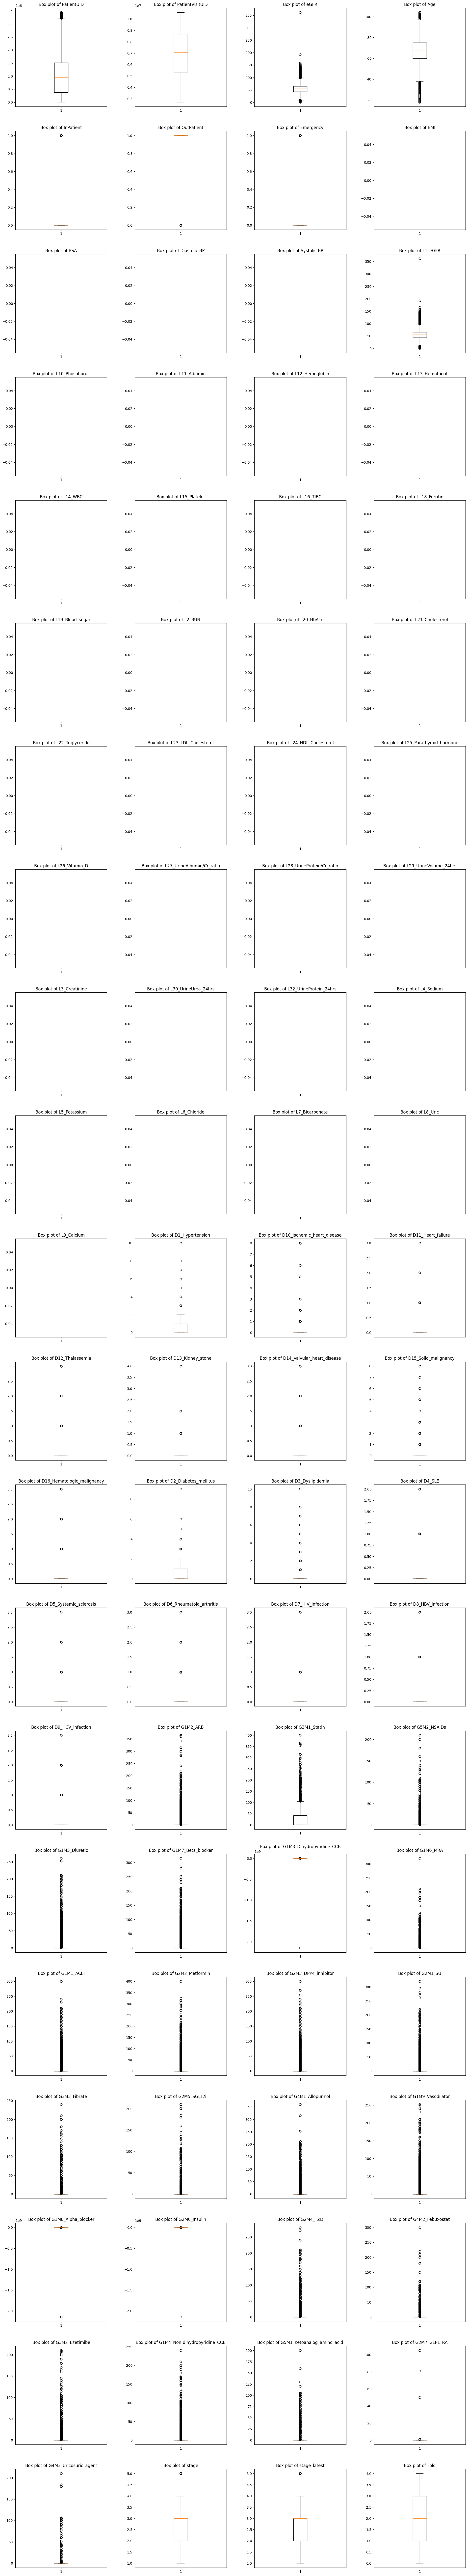

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numeric_columns)
num_plots_per_row = 4
num_rows = num_cols // num_plots_per_row + 1

fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(20, 5 * num_rows))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numeric_columns):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    axs[row, col].boxplot(df[column])
    axs[row, col].set_title('Box plot of ' + column)

# Hide empty subplots
for i in range(num_cols, num_rows * num_plots_per_row):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    fig.delaxes(axs[row, col])

plt.show()

###**plot**

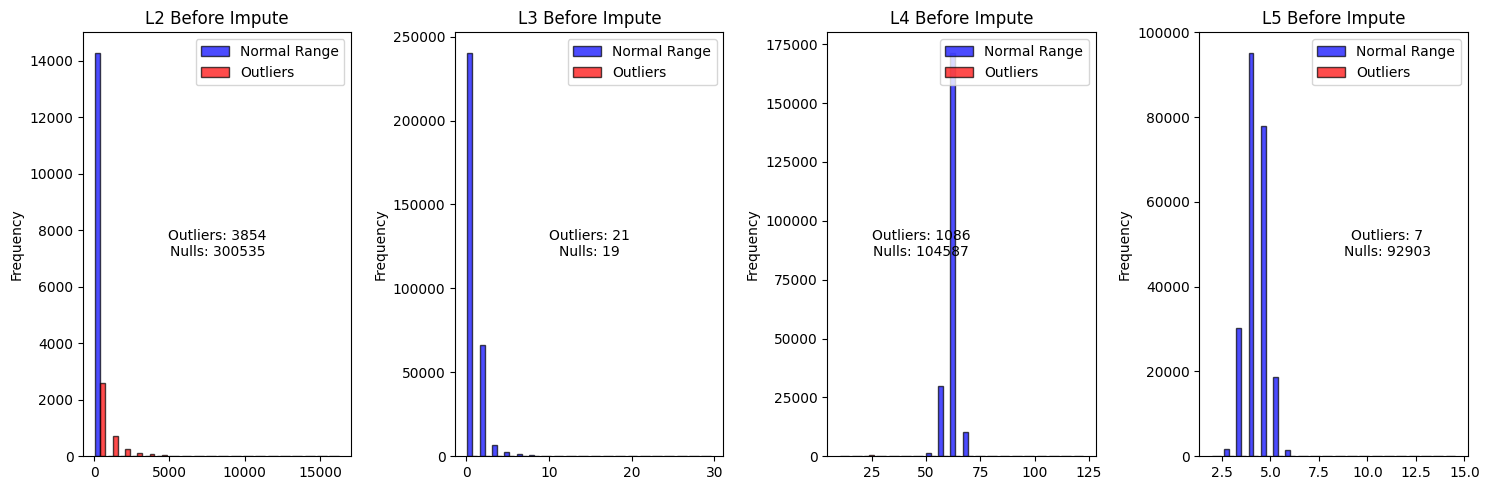

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
check_before_impute = df['L2_BUN']  # Change column name
reference_range = (0, 200)  # Define the reference range
outliersL2 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 1)
plt.hist([check_before_impute[~outliersL2], check_before_impute[outliersL2]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL2.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L2 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L3_Creatinine']  # Change column name
reference_range = (0, 20)  # Define the reference range
outliersL3 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 2)
plt.hist([check_before_impute[~outliersL3], check_before_impute[outliersL3]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL3.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L3 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L4_Sodium']  # Change column name
reference_range = (50, 156)  # Define the reference range
outliersL4 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 3)
plt.hist([check_before_impute[~outliersL4], check_before_impute[outliersL4]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL4.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L4 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.35, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L5_Potassium']  # Change column name
reference_range = (2, 10)  # Define the reference range
outliersL5 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 4)
plt.hist([check_before_impute[~outliersL5], check_before_impute[outliersL5]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL5.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L5 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.7, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


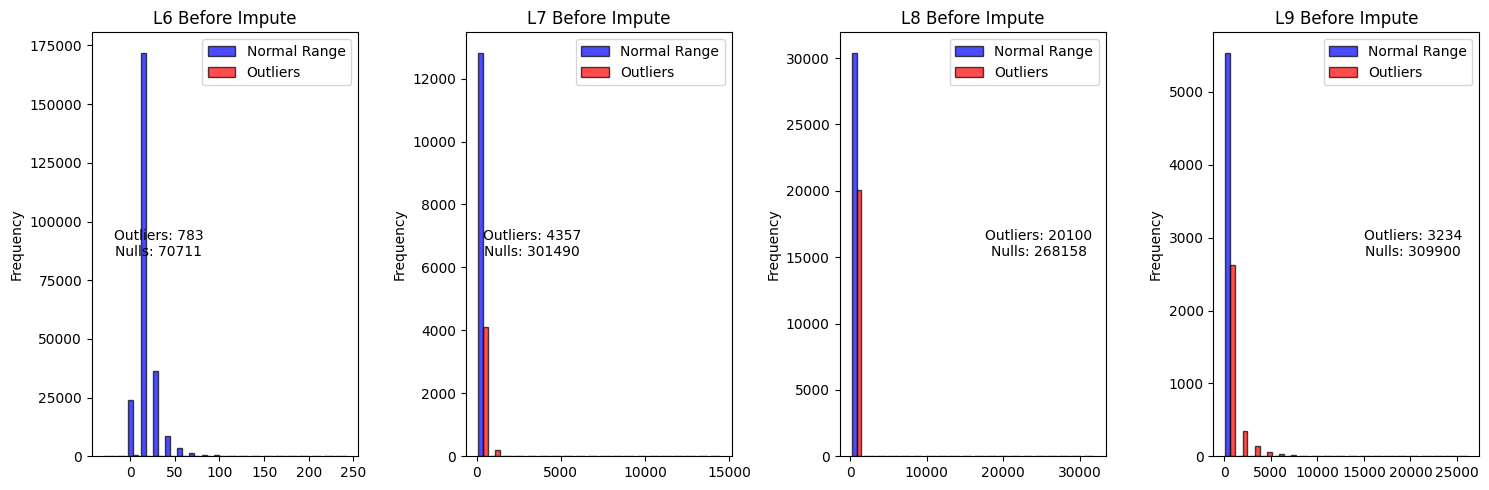

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
check_before_impute = df['L6_Chloride']  # Change column name
reference_range = (5, 120)  # Define the reference range
outliersL6 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 1)
plt.hist([check_before_impute[~outliersL6], check_before_impute[outliersL6]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL6.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L6 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.25, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L7_Bicarbonate']  # Change column name
reference_range = (5, 200)  # Define the reference range
outliersL7 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 2)
plt.hist([check_before_impute[~outliersL7], check_before_impute[outliersL7]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL7.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L7 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.25, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L8_Uric']  # Change column name
reference_range = (1, 100)  # Define the reference range
outliersL8 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 3)
plt.hist([check_before_impute[~outliersL8], check_before_impute[outliersL8]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL8.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L8 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.75, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L9_Calcium']  # Change column name
reference_range = (0, 100)  # Define the reference range
outliersL9 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 4)
plt.hist([check_before_impute[~outliersL9], check_before_impute[outliersL9]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL9.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L9 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.75, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


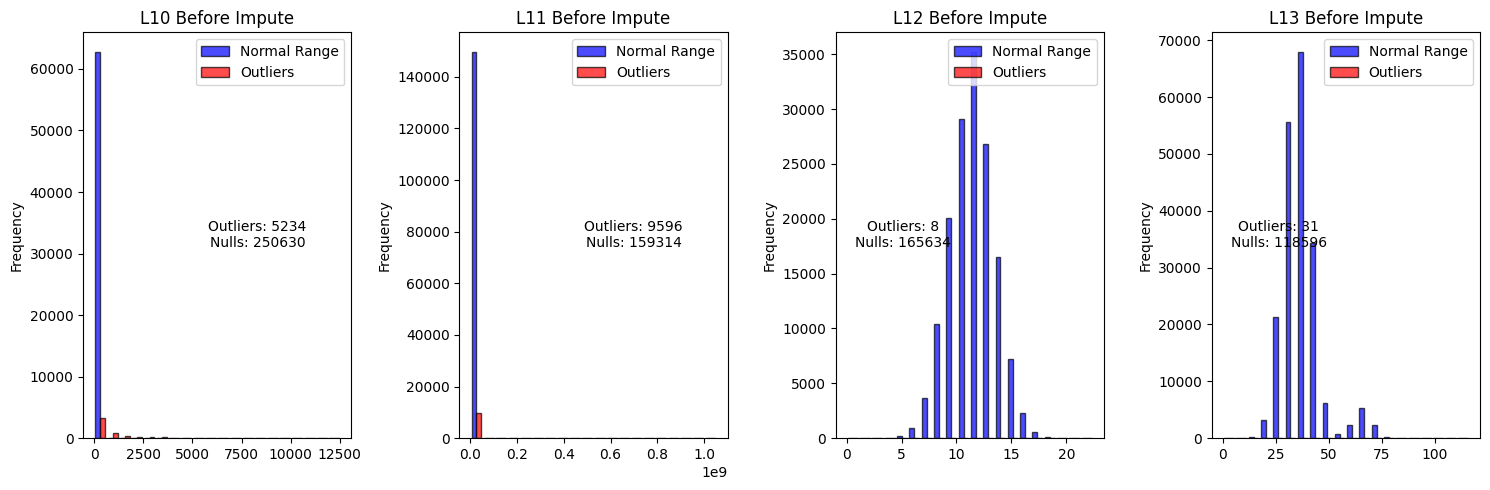

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
check_before_impute = df['L10_Phosphorus']  # Change column name
reference_range = (0, 13)  # Define the reference range
outliersL10 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 1)
plt.hist([check_before_impute[~outliersL10], check_before_impute[outliersL10]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL10.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L10 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L11_Albumin']  # Change column name
reference_range = (2.1, 10)  # Define the reference range
outliersL11 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 2)
plt.hist([check_before_impute[~outliersL11], check_before_impute[outliersL11]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL11.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L11 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L12_Hemoglobin']  # Change column name
reference_range = (1 , 20)  # Define the reference range
outliersL12 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 3)
plt.hist([check_before_impute[~outliersL12], check_before_impute[outliersL12]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL12.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L12 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.25, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L13_Hematocrit']  # Change column name
reference_range = ( 0, 100)  # Define the reference range
outliersL13 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 4)
plt.hist([check_before_impute[~outliersL13], check_before_impute[outliersL13]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL13.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L13 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.25, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


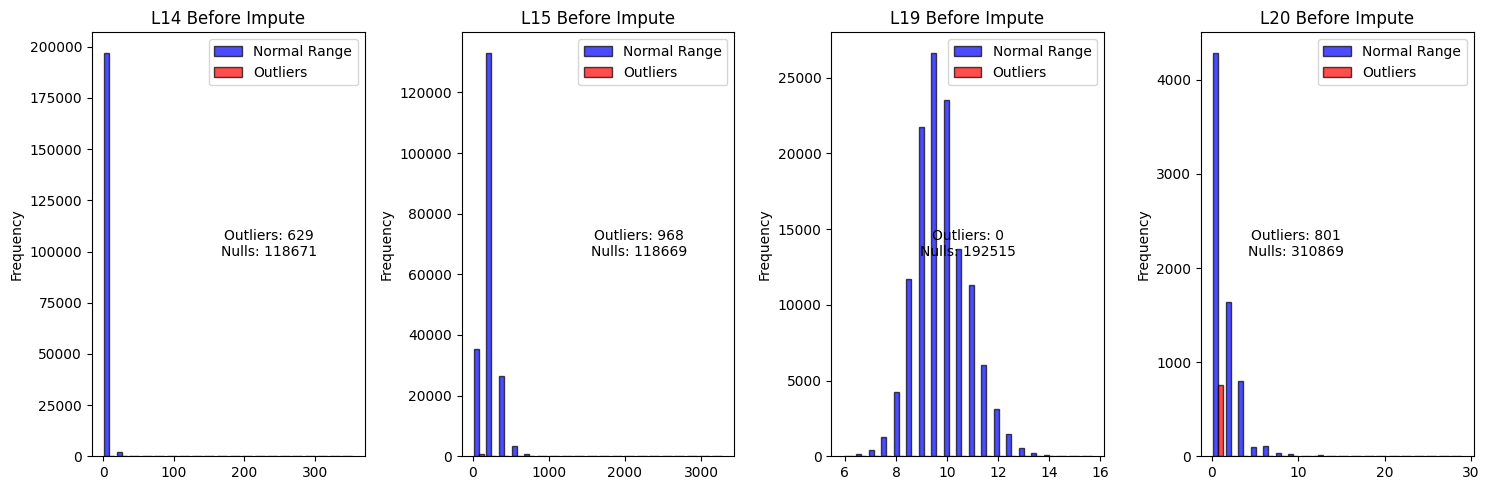

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
check_before_impute = df['L14_WBC']  # Change column name
reference_range = (1, 30)  # Define the reference range
outliersL14 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 1)
plt.hist([check_before_impute[~outliersL14], check_before_impute[outliersL14]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL14.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L14 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L15_Platelet']  # Change column name
reference_range = (30, 1000)  # Define the reference range
outliersL15 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 2)
plt.hist([check_before_impute[~outliersL15], check_before_impute[outliersL15]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL15.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L15 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L19_Blood_sugar']  # Change column name
reference_range = (0, 1000)  # Define the reference range
outliersL19 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 3)
plt.hist([check_before_impute[~outliersL19], check_before_impute[outliersL19]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL19.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L19 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L20_HbA1c']  # Change column name
reference_range = (1, 10)  # Define the reference range
outliersL20 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 4)
plt.hist([check_before_impute[~outliersL20], check_before_impute[outliersL20]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL20.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L20 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.35, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [48]:
import numpy as np

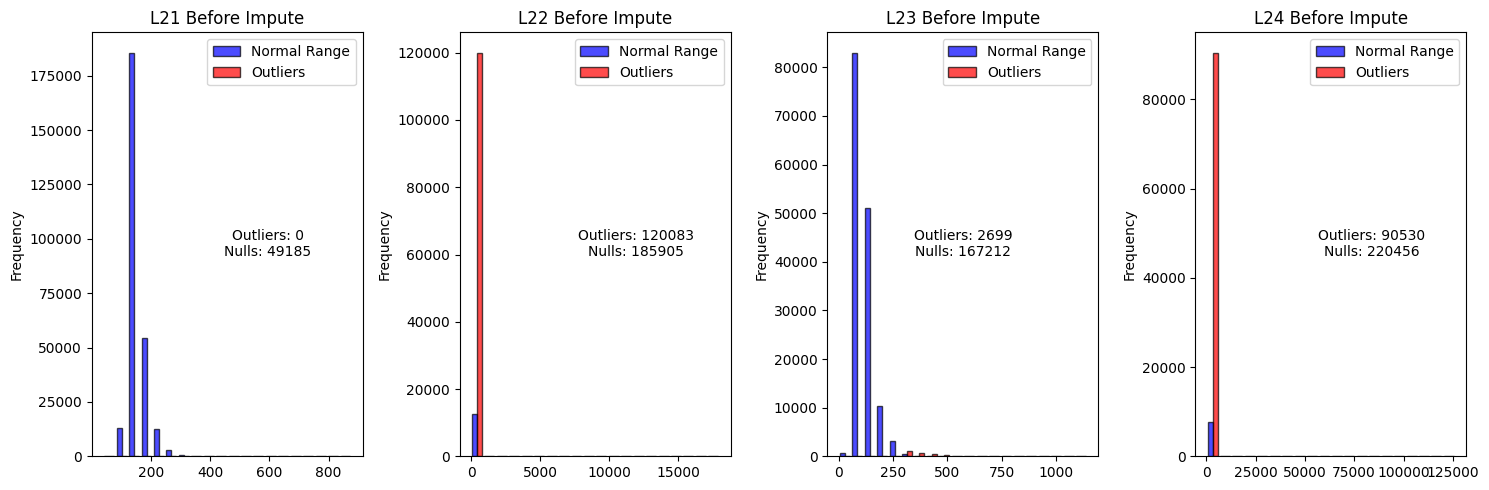

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
check_before_impute = df['L21_Cholesterol']  # Change column name
reference_range = (10, 1000)  # Define the reference range
outliersL21 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 1)
plt.hist([check_before_impute[~outliersL21], check_before_impute[outliersL21]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL21.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L21 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L22_Triglyceride']  # Change column name
reference_range = (10, 2000)  # Define the reference range
outliersL22 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 2)
plt.hist([check_before_impute[~outliersL22], check_before_impute[outliersL22]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL22.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L22 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L23_LDL_Cholesterol']  # Change column name
reference_range = (10, 300)  # Define the reference range
outliersL23 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 3)
plt.hist([check_before_impute[~outliersL23], check_before_impute[outliersL23]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL23.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L23 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['L24_HDL_Cholesterol']  # Change column name
reference_range = (20, 1000)  # Define the reference range
outliersL24 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 4, 4)
plt.hist([check_before_impute[~outliersL24], check_before_impute[outliersL24]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL24.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L24 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [57]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

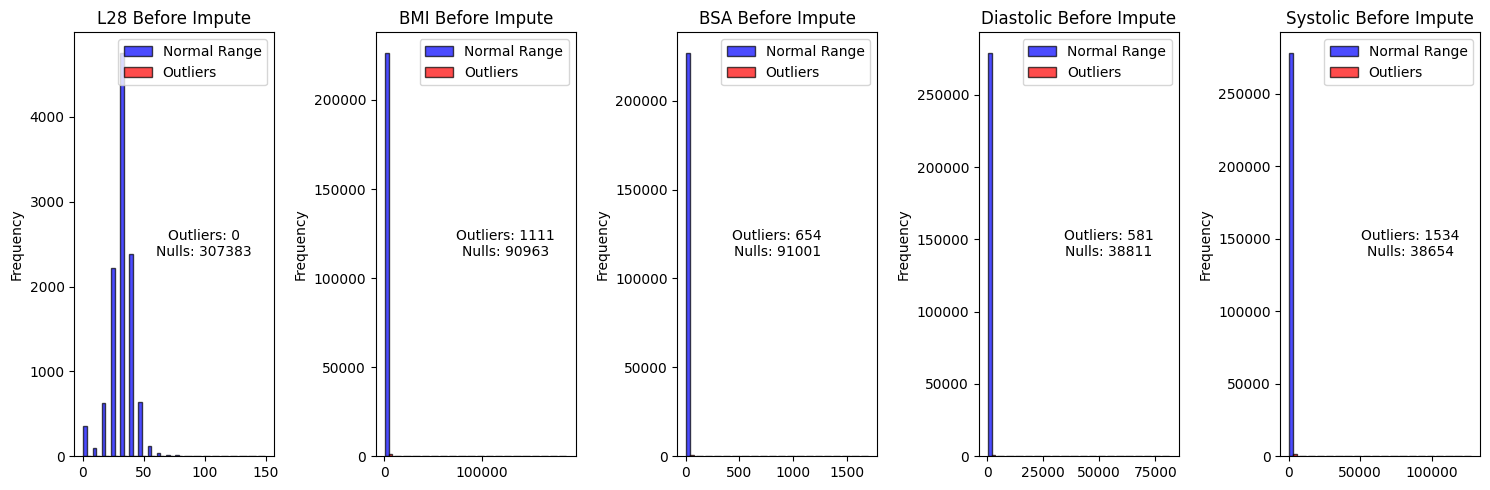

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
check_before_impute = df['L28_UrineProtein/Cr_ratio']  # Change column name
reference_range = (0, 500)  # Define the reference range
outliersL28 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 5, 1)
plt.hist([check_before_impute[~outliersL28], check_before_impute[outliersL28]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL28.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('L28 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['BMI']  # Change column name
reference_range = (10, 50)  # Define the reference range
outliersBMI = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 5, 2)
plt.hist([check_before_impute[~outliersBMI], check_before_impute[outliersBMI]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersBMI.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('BMI Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['BSA']  # Change column name
reference_range = (1, 3)  # Define the reference range
outliersBSA = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 5, 3)
plt.hist([check_before_impute[~outliersBSA], check_before_impute[outliersBSA]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersBSA.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('BSA Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['Diastolic BP']  # Change column name
reference_range = (10, 120)  # Define the reference range
outliersDi = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 5, 4)
plt.hist([check_before_impute[~outliersDi], check_before_impute[outliersDi]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersDi.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('Diastolic Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

check_before_impute = df['Systolic BP']  # Change column name
reference_range = (60 , 200)  # Define the reference range
outliersSy = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 5, 5)
plt.hist([check_before_impute[~outliersSy], check_before_impute[outliersSy]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersSy.sum()
null_count_before_impute = check_before_impute.isnull().sum()
plt.title('Systolic Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.5, f"Outliers: {outlier_count_before_impute}\nNulls: {null_count_before_impute}",
         ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

##**change outlier to null**

In [61]:
df.loc[outliersL2, 'L2_BUN'] = None
df.loc[outliersL3, 'L3_Creatinine'] = None
df.loc[outliersL4, 'L4_Sodium'] = None
df.loc[outliersL5, 'L5_Potassium'] = None
df.loc[outliersL6, 'L6_Chloride'] = None
df.loc[outliersL7, 'L7_Bicarbonate'] = None
df.loc[outliersL8, 'L8_Uric'] = None
df.loc[outliersL9, 'L9_Calcium'] = None
df.loc[outliersL10, 'L10_Phosphorus'] = None
df.loc[outliersL11, 'L11_Albumin'] = None
df.loc[outliersL12, 'L12_Hemoglobin'] = None
df.loc[outliersL13, 'L13_Hematocrit'] = None
df.loc[outliersL14, 'L14_WBC'] = None
df.loc[outliersL15, 'L15_Platelet'] = None
df.loc[outliersL19, 'L19_Blood_sugar'] = None
df.loc[outliersL20, 'L20_HbA1c'] = None
df.loc[outliersL21, 'L21_Cholesterol'] = None
df.loc[outliersL22, 'L22_Triglyceride'] = None
df.loc[outliersL23, 'L23_LDL_Cholesterol'] = None
df.loc[outliersL24, 'L24_HDL_Cholesterol'] = None
df.loc[outliersL28, 'L28_UrineProtein/Cr_ratio'] = None
df.loc[outliersBMI, 'BMI'] = None
df.loc[outliersBSA, 'BSA'] = None
df.loc[outliersDi, 'Diastolic BP'] = None
df.loc[outliersSy, 'Systolic BP'] = None

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318675 entries, 0 to 318674
Data columns (total 94 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   PatientUID                    318675 non-null  int64  
 1   PatientVisitUID               318675 non-null  int64  
 2   CWhen                         318675 non-null  object 
 3   eGFR                          318675 non-null  float64
 4   datetime                      318675 non-null  object 
 5   PreviousDateTime              318674 non-null  object 
 6   Sex                           318675 non-null  object 
 7   Age                           318675 non-null  float64
 8   ENTY                          318675 non-null  object 
 9   NATNL                         318675 non-null  object 
 10  VisitLocation                 318675 non-null  object 
 11  StartDTTM                     318675 non-null  object 
 12  EndDttm                       318675 non-nul

Number of outliers: 0


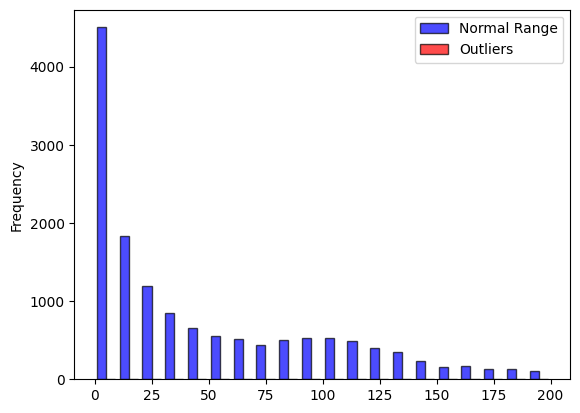

In [63]:
import matplotlib.pyplot as plt
check = df['L2_BUN'] # you have to change column name
reference_range = (0, 200) # Define the reference range
outliers = (check < reference_range[0]) | (check > reference_range[1])

plt.hist([check[~outliers], check[outliers]], bins=20, color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count = outliers.sum()
print(f"Number of outliers: {outlier_count}")

plt.ylabel('Frequency')
plt.legend()
plt.show()


Number of outliers: 0


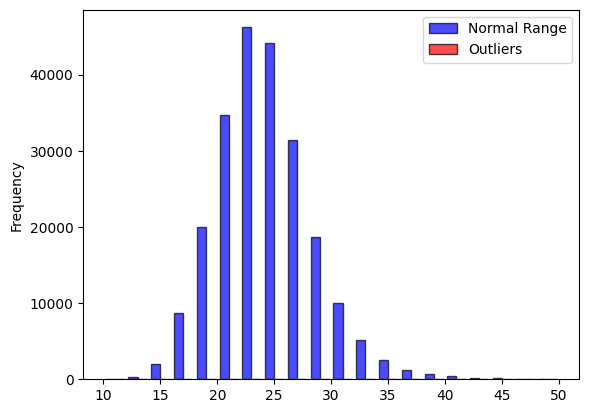

In [64]:
import matplotlib.pyplot as plt
check = df['BMI'] # you have to change column name
reference_range = (10, 50) # Define the reference range
outliers = (check < reference_range[0]) | (check > reference_range[1])

plt.hist([check[~outliers], check[outliers]], bins=20, color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count = outliers.sum()
print(f"Number of outliers: {outlier_count}")

plt.ylabel('Frequency')
plt.legend()
plt.show()


In [65]:
df.to_csv('/content/drive/MyDrive/kidney/cut_outlier.csv')